In [1]:
%load_ext autoreload
%autoreload 2
import os
#change current working directory to the parent directory
import sys

# Change working directory to ../.. only if not already there
if not hasattr(sys, "_parent_dir_set"):
    parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
    if os.getcwd() != parent_dir:
        os.chdir(parent_dir)
    sys._parent_dir_set = parent_dir
else:
    parent_dir = sys._parent_dir_set
# Add parent_dir to sys.path only if not already present
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import numpy as np
from SRtools import sr_mcmc as srmc
from SRtools import deathTimesDataSet as dtds
import matplotlib.pyplot as plt

 # Raw Data loading and plotting

In [2]:
rawDataFile = 'Rawfiles/Celegans.csv'



In [3]:
properties = ['Device','Experiment','Plate Name','Experiment Temperature']
events_col ='censor'
event_is_censored = True
death_times_column ='Age at Death  (d)  Raw'
selection_criteria = {'Experiment Temperature': ['19.5','20','20.0','20.5','21','21.5'],'Experiment':['2012_04_27_temperature_series_20C','2015_01_15_Col_Ch']}
cleanedDataFile = 'Cleaned_datasets/Celegans.csv'
cohorts = dtds.DatasetCollection(file_names=rawDataFile,properties=properties,events_column=events_col,death_times_column=death_times_column,event_is_censored=event_is_censored)

In [4]:
print(cohorts.datasets.keys())

dict_keys(['Device:_azure,Experiment:_2015_01_15_Col_Ch,Plate Name:_azure_a::3,Experiment Temperature:_20.0', 'Device:_azure,Experiment:_2015_01_15_Col_Ch,Plate Name:_azure_b::0,Experiment Temperature:_20.0', 'Device:_azure,Experiment:_2015_01_15_Col_Ch,Plate Name:_azure_c::3,Experiment Temperature:_20.0', 'Device:_birch,Experiment:_2015_01_15_Col_Ch,Plate Name:_birch_a::3,Experiment Temperature:_20.0', 'Device:_birch,Experiment:_2015_01_15_Col_Ch,Plate Name:_birch_b::0,Experiment Temperature:_20.0', 'Device:_birch,Experiment:_2015_01_15_Col_Ch,Plate Name:_birch_c::3,Experiment Temperature:_20.0', 'Device:_birch,Experiment:_2015_01_15_Col_Ch,Plate Name:_birch_d::0,Experiment Temperature:_20.0', 'Device:_cyan,Experiment:_2015_01_15_Col_Ch,Plate Name:_cyan_a::3,Experiment Temperature:_20.0', 'Device:_cyan,Experiment:_2015_01_15_Col_Ch,Plate Name:_cyan_b::0,Experiment Temperature:_20.0', 'Device:_cyan,Experiment:_2015_01_15_Col_Ch,Plate Name:_cyan_c::3,Experiment Temperature:_20.0', 'Devi

In [5]:
cohorts.nDatasets()

114

['ben_c::3', 'duck_b::1', 'birch_c::3', 'maple_c::3', 'loon_c::2', 'birch_b::0', 'swan_a::3', 'rise_a::3', 'stone_a::1', 'goose_d::3', 'duck_a::3', 'cube_d::3', 'loon_d::0', 'rise_a::0', 'gold_c::2', 'stone_c::0', 'dont_d::0', 'birch_a::3', 'azure_b::0', 'maple_d::0', 'hare_c::2', 'pink_b::0', 'fall_c::2', 'fall_d::3', 'pink_c::3', 'moose_a::0', 'green_d::0', 'swan_c::2', 'dawn_c::2', 'dont_c::3', 'gold_d::0', 'swan_a::1', 'moose_d::3', 'goose_a::0', 'duck_a::0', 'goose_b::1', 'frog_a::0', 'mouse_a::3', 'frog_d::3', 'gold_b::1', 'stone_c::3', 'black_c::2', 'cube_a::3', 'green_b::0', 'deer_a::3', 'dawn_b::1', 'pink_a::3', 'cyan_c::3', 'rise_d::0', 'dawn_a::1', 'goose_c::2', 'swan_d::0', 'pink_d::0', 'swan_b::1', 'swan_b::2', 'azure_c::3', 'dawn_c::3', 'dawn_a::3', 'frog_b::1', 'cedar_a::3', 'hare_b::1', 'dawn_b::2', 'birch_d::0', 'green_c::3', 'frog_d::0', 'moose_b::1', 'fall_b::1', 'gold_a::3', 'ben_a::1', 'dawn_a::0', 'ben_b::2', 'rise_d::3', 'dont_b::0', 'rise_c::2', 'hare_d::0', 'fa

/Users/navehr/Dropbox/naveh/weizmann/uri alon/aging/code_3/SRtools/SRtools/deathTimesDataSet.py:1100: UserWarning: No datasets found matching the given criteria. Returning None.
  warnings.warn("No datasets found matching the given criteria. Returning None.")
/Users/navehr/Dropbox/naveh/weizmann/uri alon/aging/code_3/SRtools/SRtools/deathTimesDataSet.py:1100: UserWarning: No datasets found matching the given criteria. Returning None.
  warnings.warn("No datasets found matching the given criteria. Returning None.")
/Users/navehr/Dropbox/naveh/weizmann/uri alon/aging/code_3/SRtools/SRtools/deathTimesDataSet.py:1100: UserWarning: No datasets found matching the given criteria. Returning None.
  warnings.warn("No datasets found matching the given criteria. Returning None.")
/Users/navehr/Dropbox/naveh/weizmann/uri alon/aging/code_3/SRtools/SRtools/deathTimesDataSet.py:1100: UserWarning: No datasets found matching the given criteria. Returning None.
  warnings.warn("No datasets found matchin

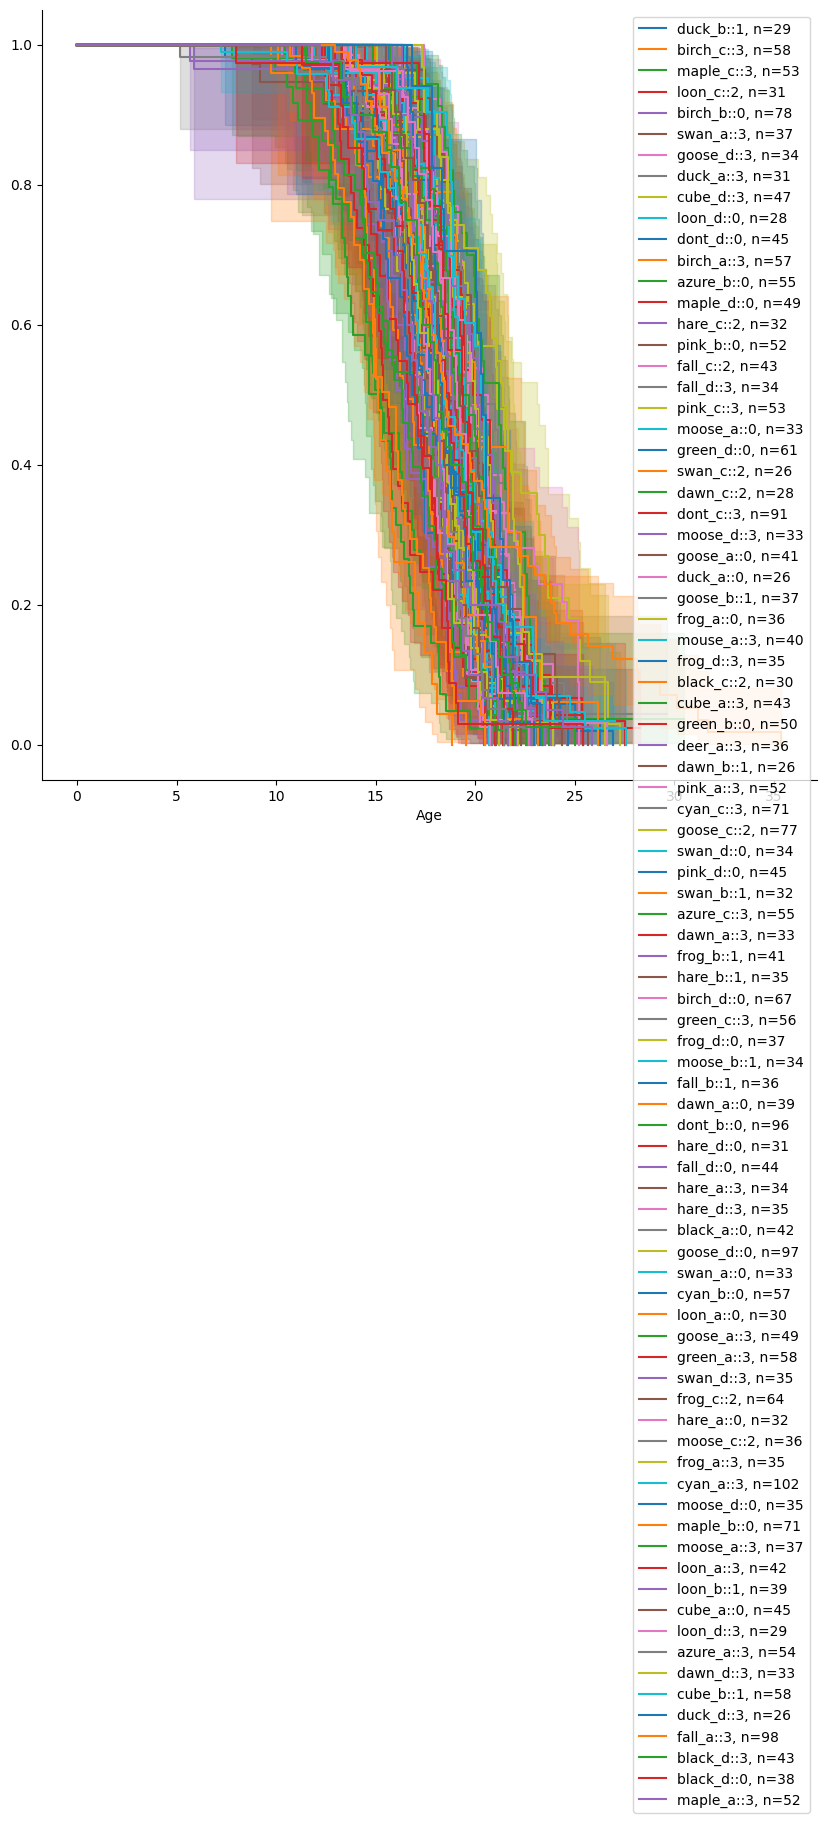

In [6]:
prop = 'Plate Name'
prop_values =[]
for dataset in cohorts.datasets.values():
    prop_values.append(dataset.properties[prop][0])
prop_values = list(set(prop_values))
print(prop_values)
fig, ax = plt.subplots(1,1,figsize=(10,10))
for value in prop_values:
    cohort=cohorts.get_combined_dataset(properties=[prop,'Experiment Temperature'],values=[value,['19.5','20','20.0','20.5','21','21.5']])
    if cohort is not None:
        cohort.plotSurvival(ax=ax,label=f"{value}, n={cohort.n}")



# Choosing only relevant cohorts and sanity checking
We aggragate all the relevant cohorts (controls) and sample with the same size distribution as the original cohorts. We look to see the spread as a sanity check.
We then calculate the steepnes (ML/IQR) and longevity (ML) of each sampled and data cohorts.

In [7]:
print(list(selection_criteria.values()))

[['19.5', '20', '20.0', '20.5', '21', '21.5'], ['2012_04_27_temperature_series_20C', '2015_01_15_Col_Ch']]


In [8]:
agragated_cohort = cohorts.get_combined_dataset(properties=list(selection_criteria.keys()),values=list(selection_criteria.values()))
print(agragated_cohort.n)

3271


In [9]:
selected_cohorts = cohorts.getSubset(properties=list(selection_criteria.keys()),values=list(selection_criteria.values()))
print(selected_cohorts.nDatasets())

72


array([<Axes: title={'center': 'Sampled datasets n datasets=100'}, xlabel='Age'>,
       <Axes: title={'center': 'Data datasets'}, xlabel='Age'>],
      dtype=object)

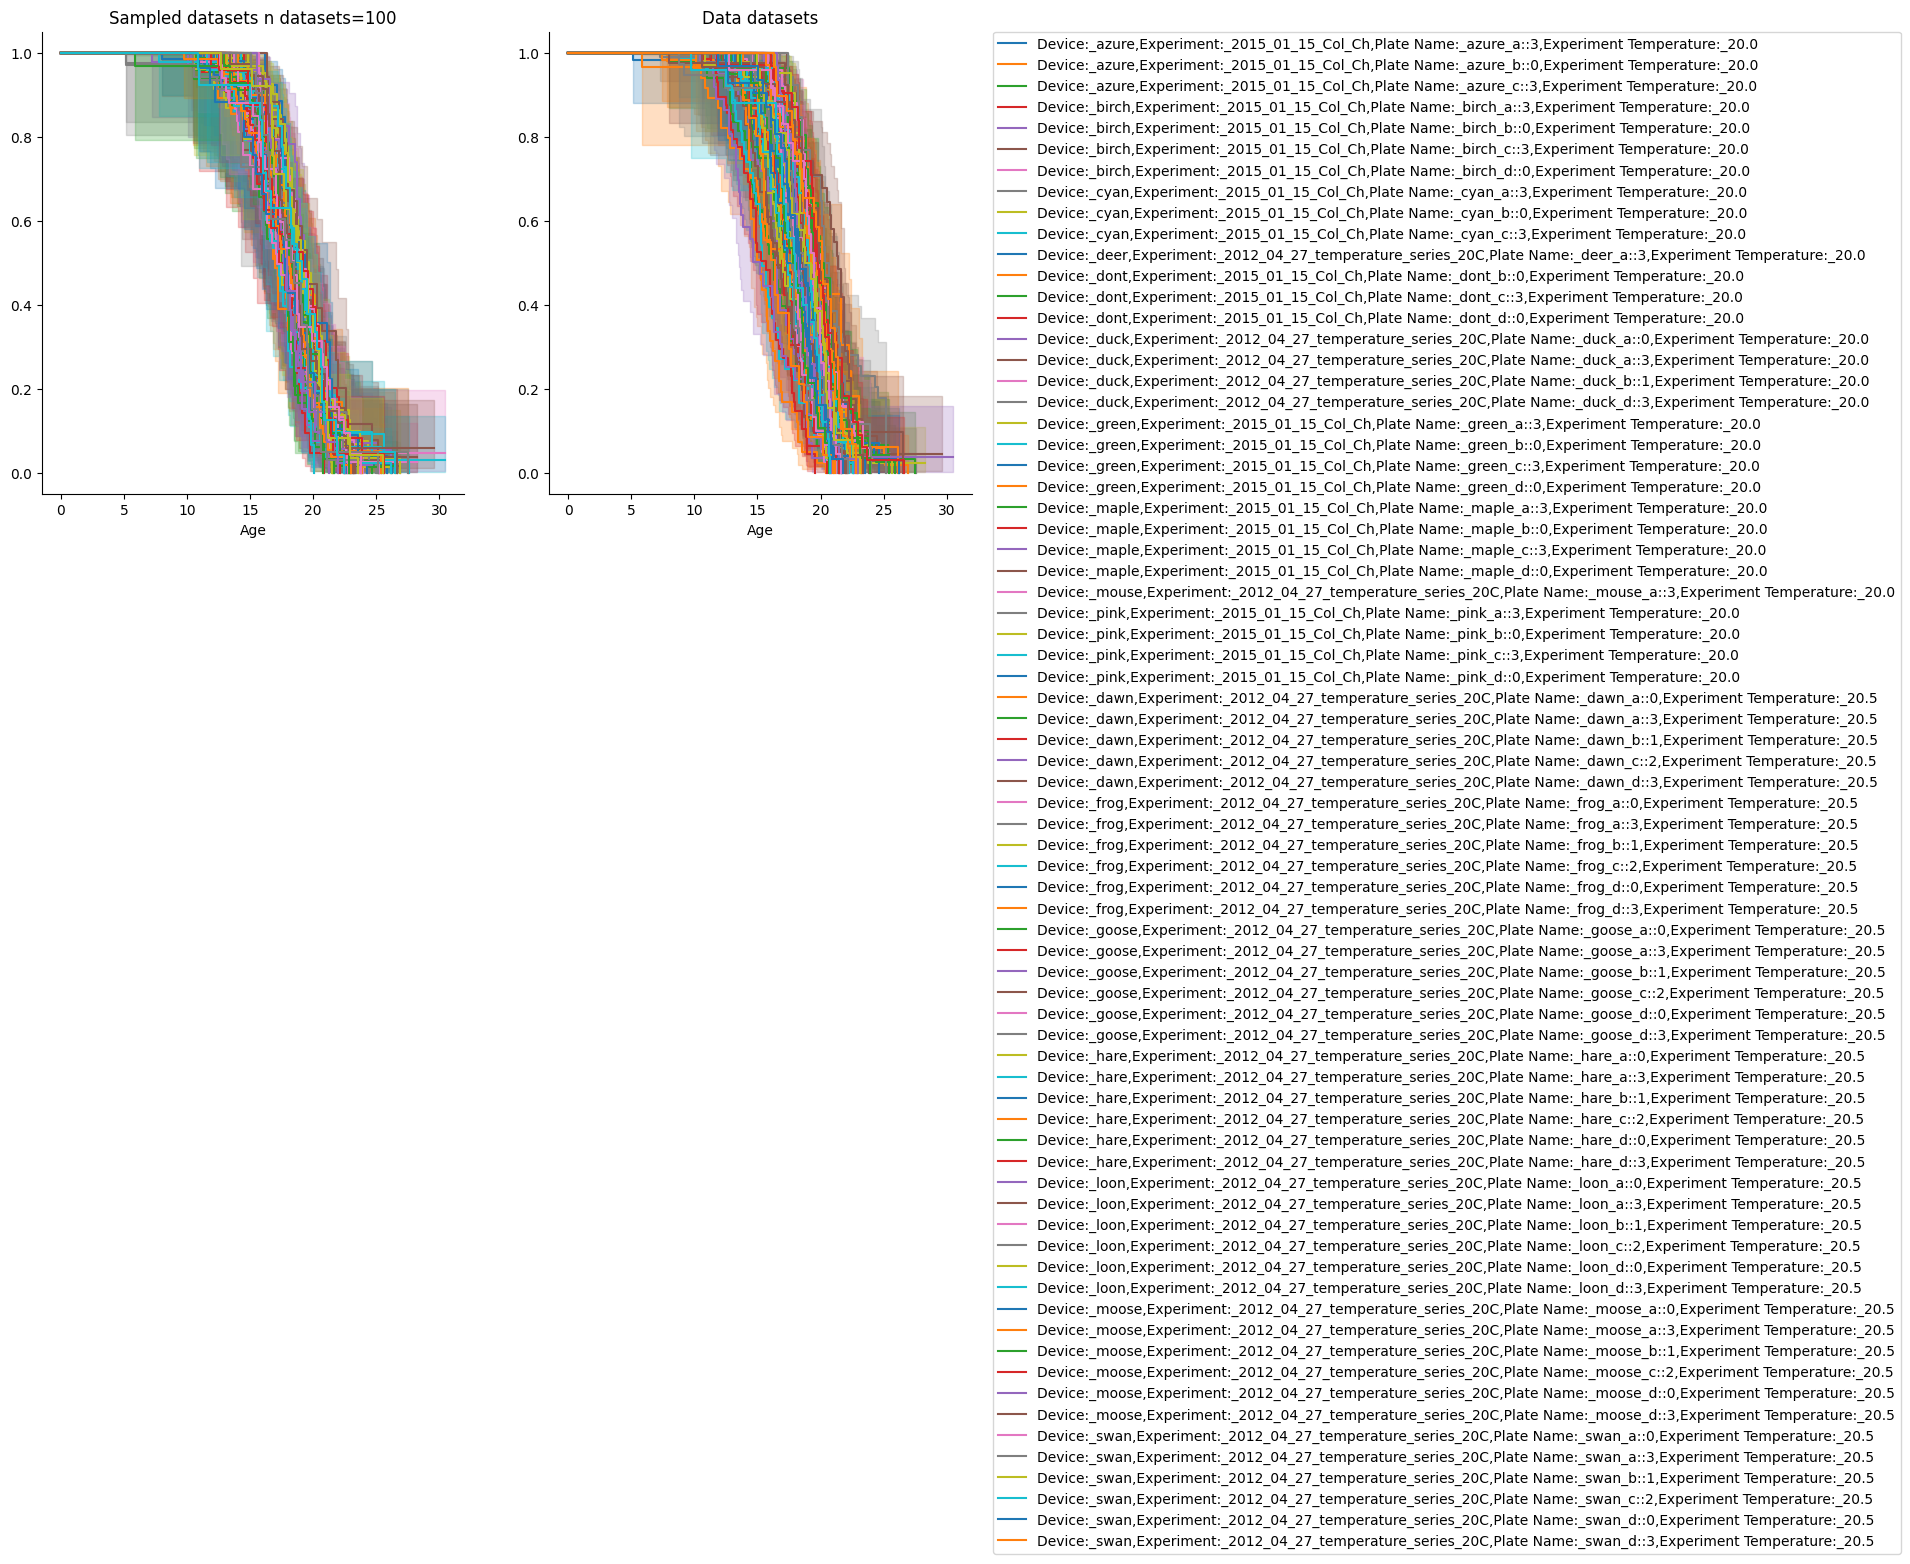

In [10]:
selected_cohorts.plotSurvivalComparison()

<Axes: title={'center': 'Median lifetime vs Steepness Data and sampled datasets'}, xlabel='Median lifetime', ylabel='Steepness'>

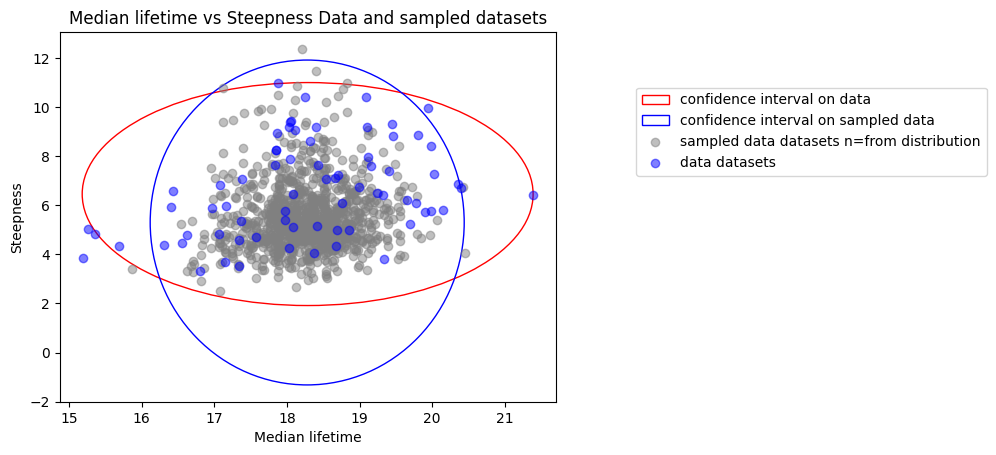

In [11]:
selected_cohorts.drawConfidenceEllipse(data_percentile=100,sampled_percentile=99.9)

# Cleaning outliers 
We remove outliers that are outside the sampled cohorts confidence interval  (we do each axis saparately so the elipses are a bit missleading). We the replot the spreads of the cleaned data vs sampled data (we smaple from the cleaned cohorts)

In [12]:
cleaned_cohorts = selected_cohorts.clean_DatasetCollection(n_samples=1000,sampled_percentile=99.9)

Removing dataset Device:_azure,Experiment:_2015_01_15_Col_Ch,Plate Name:_azure_b::0,Experiment Temperature:_20.0 with median lifetime 15.2579 and steepness 5.016240917907745
Removing dataset Device:_green,Experiment:_2015_01_15_Col_Ch,Plate Name:_green_b::0,Experiment Temperature:_20.0 with median lifetime 15.3496 and steepness 4.847191082199137
Removing dataset Device:_maple,Experiment:_2015_01_15_Col_Ch,Plate Name:_maple_b::0,Experiment Temperature:_20.0 with median lifetime 15.6843 and steepness 4.32670344827586
Removing dataset Device:_maple,Experiment:_2015_01_15_Col_Ch,Plate Name:_maple_c::3,Experiment Temperature:_20.0 with median lifetime 15.1947 and steepness 3.838596402586904
Removing dataset Device:_dawn,Experiment:_2012_04_27_temperature_series_20C,Plate Name:_dawn_d::3,Experiment Temperature:_20.5 with median lifetime 21.3913 and steepness 6.417261654766903


<Axes: title={'center': 'Median lifetime vs Steepness Data and sampled datasets'}, xlabel='Median lifetime', ylabel='Steepness'>

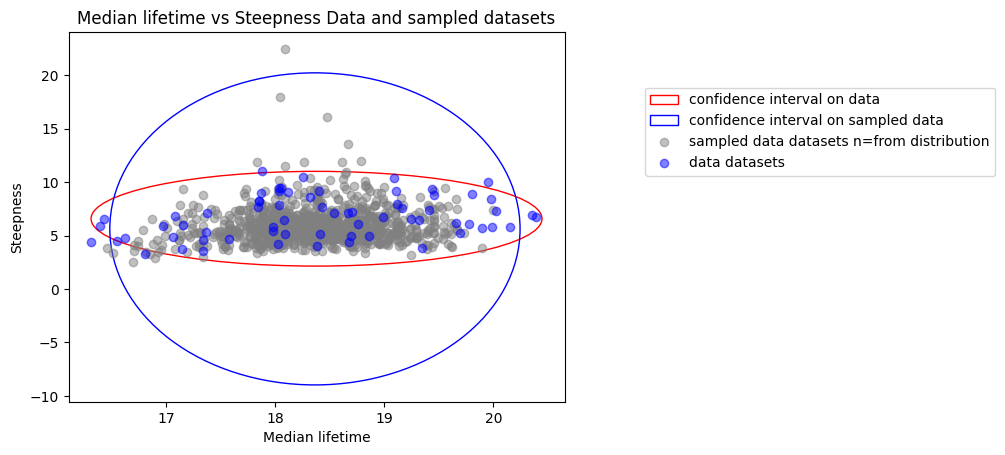

In [13]:
cleaned_cohorts.drawConfidenceEllipse(data_percentile=100,sampled_percentile=99.9)

array([<Axes: title={'center': 'Sampled datasets n datasets=100'}, xlabel='Age'>,
       <Axes: title={'center': 'Data datasets'}, xlabel='Age'>],
      dtype=object)

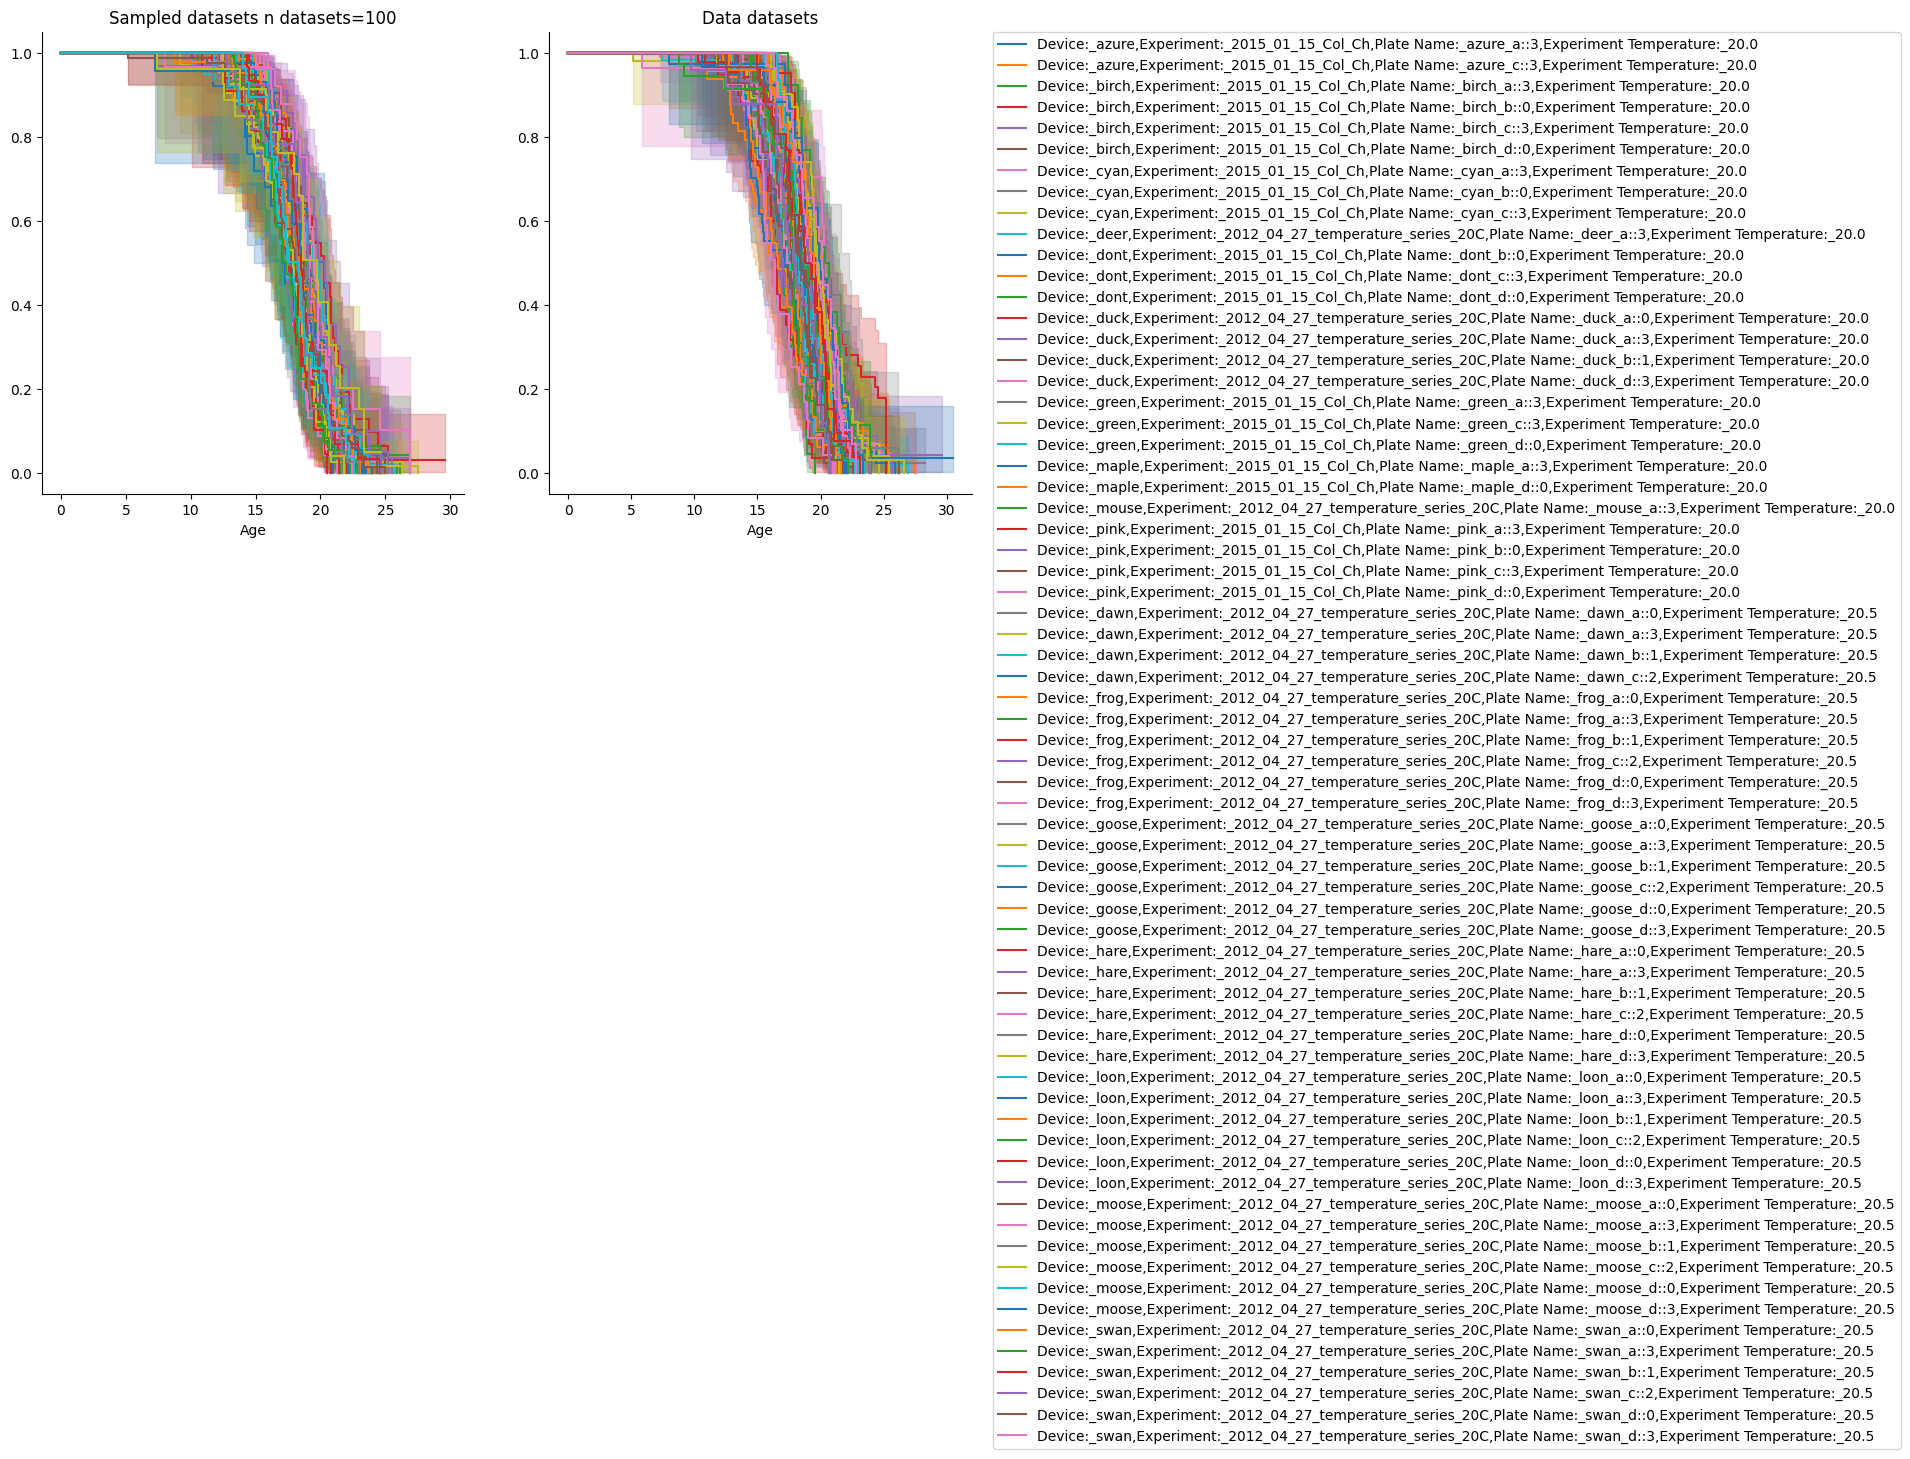

In [14]:
cleaned_cohorts.plotSurvivalComparison()

In [15]:
combined_cleaned_cohorts = cleaned_cohorts.get_combined_dataset()
print(combined_cleaned_cohorts.n)

3009


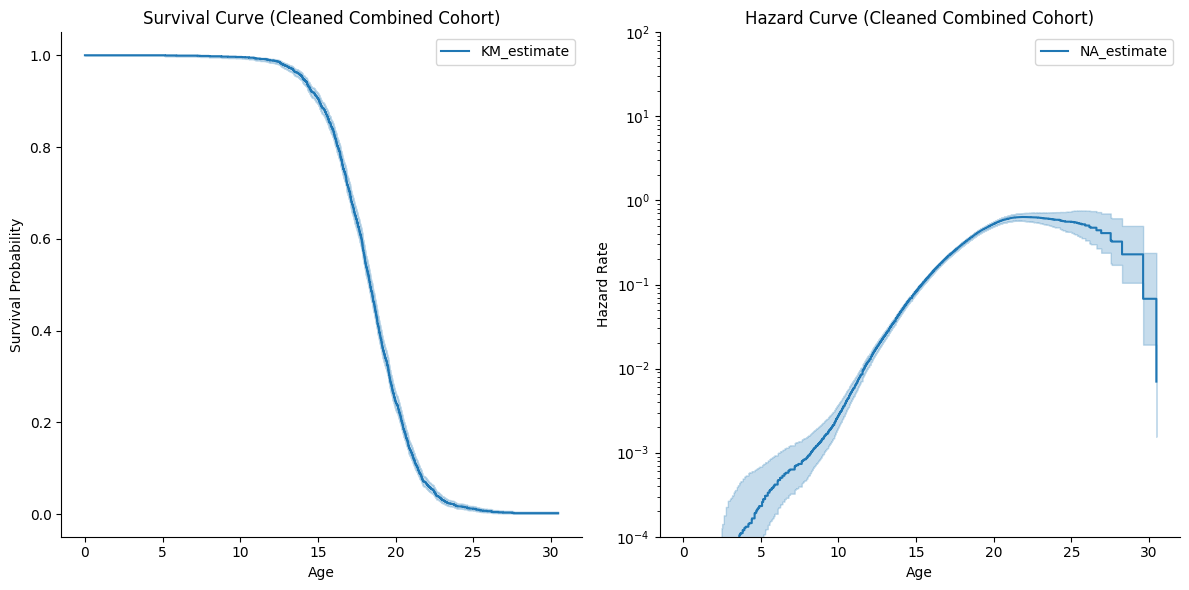

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

combined_cleaned_cohorts.bandwidth=3

# Plot survival curve on the left
combined_cleaned_cohorts.plotSurvival(ax=axes[0])
axes[0].set_title("Survival Curve (Cleaned Combined Cohort)")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Survival Probability")

# Plot hazard curve on the right
combined_cleaned_cohorts.plotHazard(ax=axes[1])
axes[1].set_title("Hazard Curve (Cleaned Combined Cohort)")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Hazard Rate")

axes[1].set_ylim(1e-4, 100)
plt.tight_layout()
plt.show()


In [17]:
combined_cleaned_cohorts.toCsv(cleanedDataFile)